This dataset contains conversations between consumers and customer support agents on Twitter to provide insights into modern customer support practices and impact. 

Sentiment Analysis and topic models. 

In [1]:
import pandas as pd

df = pd.read_csv('Twitter.csv')
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [2]:
#df.drop('Unnamed: 0', axis=1, inplace=True) 
#df.drop('Title', axis=1, inplace=True) # Remove the “Title” feature
df.isnull().sum() #Remove the rows where “Review Text” were missing.

tweet_id                       0
author_id                      0
inbound                        0
created_at                     0
text                           0
response_tweet_id          32429
in_response_to_tweet_id    25910
dtype: int64

What are the top 10 brands according to the number of tweets? (Hint: both tweets generated by the
companies and customers are considered)

In [3]:
df['tweet_id'].count()

100000

In [4]:
x = df.groupby(by="author_id").count()
x

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
11113,2,2,2,2,2,2
115712,10,10,10,10,8,7
115713,3,3,3,3,3,2
115714,25,25,25,25,25,7
115715,1,1,1,1,1,0
...,...,...,...,...,...,...
mediatemplehelp,13,13,13,13,6,13
nationalrailenq,201,201,201,201,118,180
sainsburys,1081,1081,1081,1081,569,1077


In [5]:
y = x.sort_values(by=['tweet_id'], ascending=False)
q = y.head(10).reset_index()
q

,author_id,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,AmazonHelp,6924,6924,6924,6924,4099,6906
1,AppleSupport,3106,3106,3106,3106,1190,3093
2,Uber_Support,2102,2102,2102,2102,811,2101
3,Tesco,1450,1450,1450,1450,586,1446
4,SpotifyCares,1356,1356,1356,1356,549,1350
5,British_Airways,1156,1156,1156,1156,578,1147
6,comcastcares,1092,1092,1092,1092,285,1091
7,sainsburys,1081,1081,1081,1081,569,1077
8,Delta,1039,1039,1039,1039,350,1035
9,VirginTrains,1001,1001,1001,1001,612,988


In [6]:
v = df[['text']]
v

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.
...,...
99995,@144297 We understand you have received a diff...
99996,@AmazonHelp I have already raised d issue ther...
99997,@144297 If you've shared your details via the ...
99998,@AmazonHelp It was a great help from ur side w...


Text(0, 0.5, 'Tweet Count')

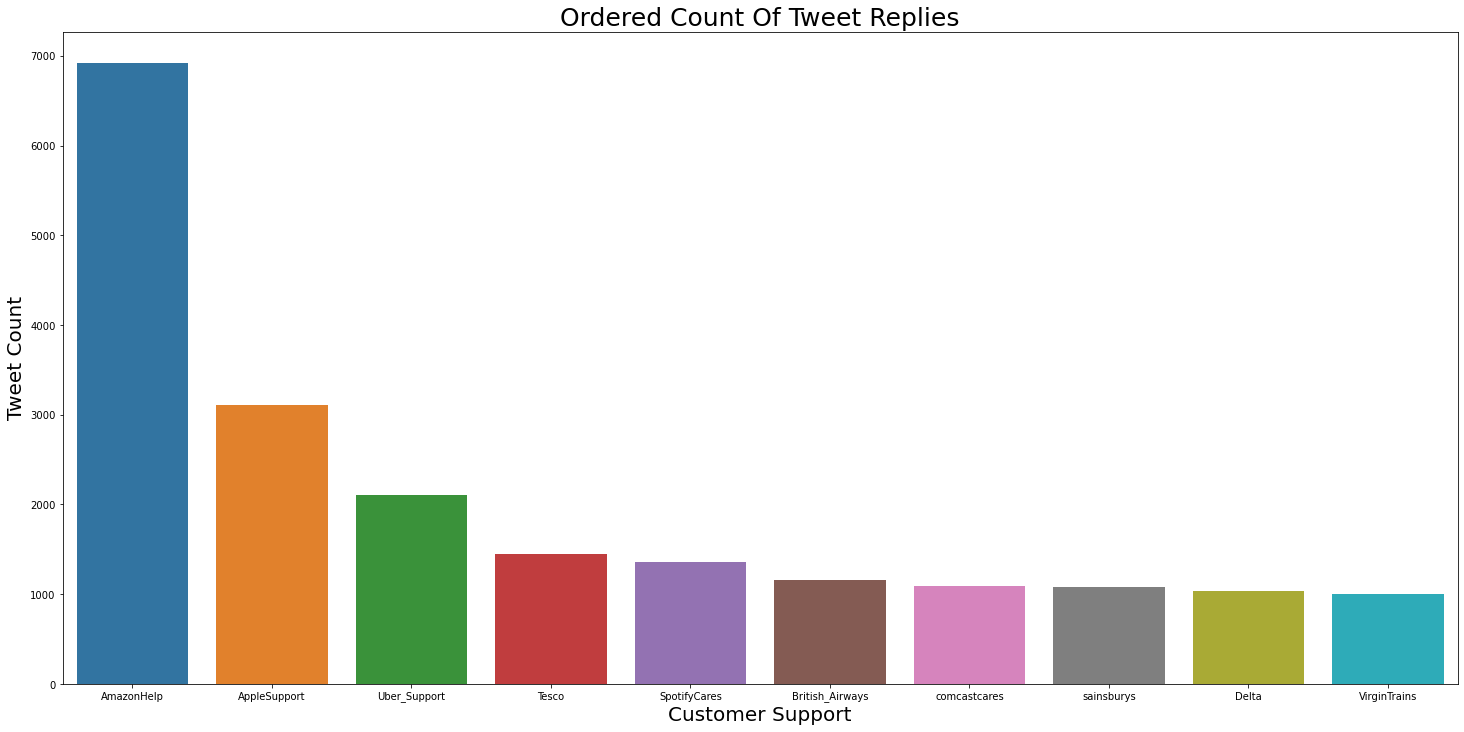

In [7]:
#Visualizing our data
import matplotlib.pyplot as plt
import seaborn as sns

#Take 10 highest tweet count
count_tweet = df['tweet_id'].groupby(df['author_id']).count().to_frame().reset_index()
ordered_count = count_tweet.nlargest(10, 'tweet_id')

plt.figure(figsize=(25, 12))
sns.barplot(x = ordered_count['author_id'], y = ordered_count['tweet_id'])
plt.title('Ordered Count Of Tweet Replies', fontsize = 25)
plt.xlabel('Customer Support', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)

In [8]:
from matplotlib import pyplot


In [9]:
#<details><summary><font color="blue"><b>Click here for solution:</b></font></summary>
AuthorCompany = df.groupby(['author_id']).count()
AuthorCompany.sort_values('tweet_id', inplace=True, ascending=False)
TopCountries = AuthorCompany.index[0:10]
print(TopCountries)

#pyplot.figure(figsize=(20,9)) 
#pyplot.title('Box Plot - Top Companies', fontsize=15)
#pyplot.xlabel('Company', fontsize=12)
#pyplot.ylabel('Tweet', fontsize=12)
#pyplot.boxplot(RatingData, labels = TopCountries);

Index(['AmazonHelp', 'AppleSupport', 'Uber_Support', 'Tesco', 'SpotifyCares',
       'British_Airways', 'comcastcares', 'sainsburys', 'Delta',
       'VirginTrains'],
      dtype='object', name='author_id')


In [10]:
u = ordered_count.reset_index()
u

,index,author_id,tweet_id
0,27495,AmazonHelp,6924
1,27497,AppleSupport,3106
2,27569,Uber_Support,2102
3,27564,Tesco,1450
4,27561,SpotifyCares,1356
5,27520,British_Airways,1156
6,27583,comcastcares,1092
7,27589,sainsburys,1081
8,27526,Delta,1039
9,27574,VirginTrains,1001


Text(0, 0.5, 'Tweet Count')

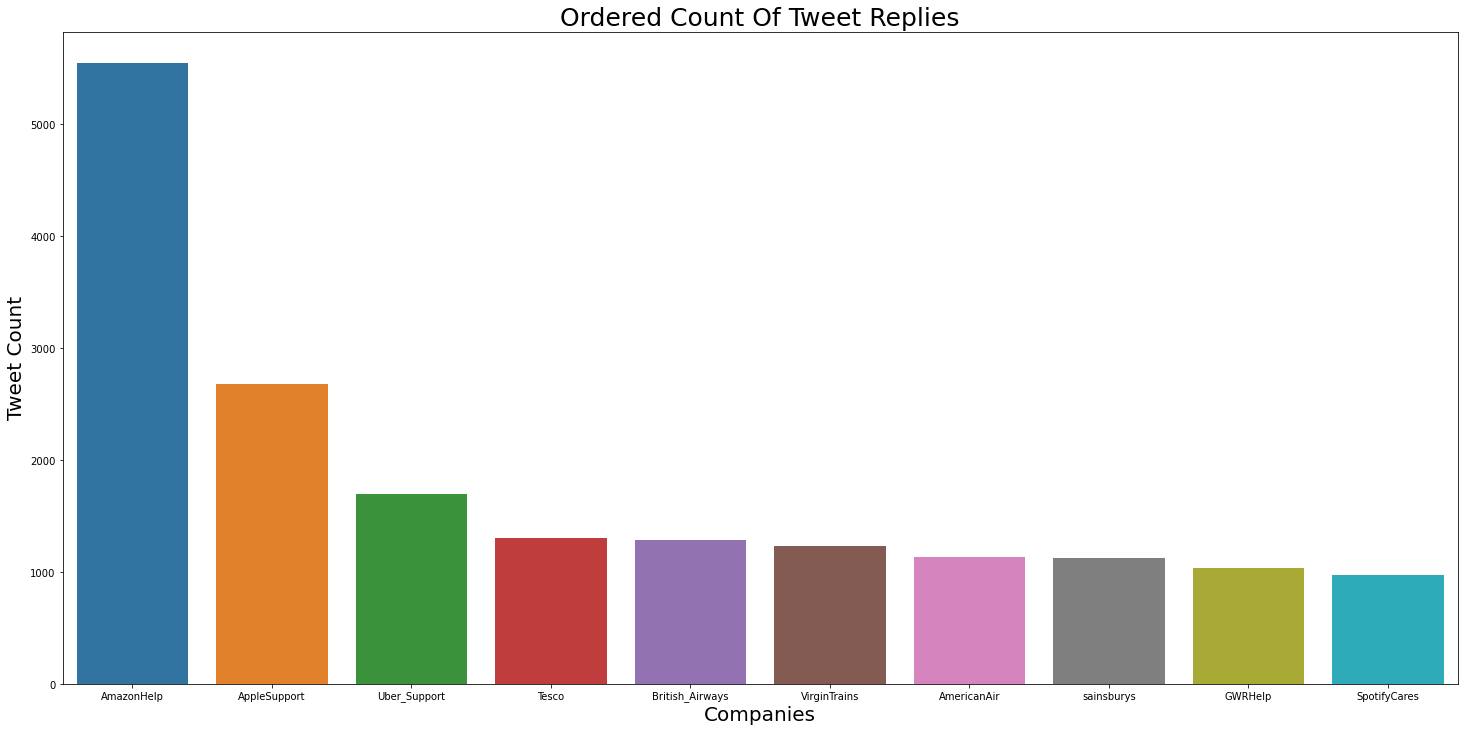

In [11]:
#z = v['text'].str.extract(pat = (r'@(\w+)'))
#z

#Visualizing our data
import matplotlib.pyplot as plt
import seaborn as sns

#Extract the customer support company
df['customer'] = df['text'].str.extract(r'@(\w+)') #, expand=False).str.strip()


#Take 10 highest tweet count
count_tweet_1 = df['tweet_id'].groupby(df['customer']).count().to_frame().reset_index()
ordered_count_1 = count_tweet_1.nlargest(10, 'tweet_id')

plt.figure(figsize=(25, 12))
sns.barplot(x = ordered_count_1['customer'], y = ordered_count_1['tweet_id'])
plt.title('Ordered Count Of Tweet Replies', fontsize = 25)
plt.xlabel('Companies', fontsize = 20)
plt.ylabel('Tweet Count', fontsize = 20)

In [12]:
o = ordered_count_1.reset_index()
o

,index,customer,tweet_id
0,27681,AmazonHelp,5547
1,27685,AppleSupport,2675
2,27779,Uber_Support,1699
3,27773,Tesco,1299
4,27711,British_Airways,1285
5,27785,VirginTrains,1231
6,27683,AmericanAir,1135
7,27850,sainsburys,1122
8,27726,GWRHelp,1039
9,27767,SpotifyCares,970


In [13]:
import pandas as pd

data={'Company':['AmazonHelp','AppleSupport','Uber_Support','Tesco','British_Airways','SpotifyCares','VirginTrains','sainsburys','AmericanAir','GWRHelp']
      ,'Total_tweets':[12471,5781,3801,2749,2441,2326,2232,2203,1135,1039]}

Top_10=pd.DataFrame(data)

Top_10

#pd.concat(ordered_count, ordered_count_1)

,Company,Total_tweets
0,AmazonHelp,12471
1,AppleSupport,5781
2,Uber_Support,3801
3,Tesco,2749
4,British_Airways,2441
5,SpotifyCares,2326
6,VirginTrains,2232
7,sainsburys,2203
8,AmericanAir,1135
9,GWRHelp,1039


Q2 : How many tweets were posted by days of a week (Mon to Sun) for the top 5 companies? (Hint:
generate one figure for each company)

In [14]:
df.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
customer                    object
dtype: object

In [15]:
df[['weekday','month','day','time','+0000','year']] = df['created_at'].str.split(" ", expand = True) 

In [16]:
Amazon = df.loc[(df['author_id'] == 'AmazonHelp')|(df['customer'] == 'AmazonHelp')]
Amazon

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
181,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0,115770,Wed,Nov,22,09:23:01,+0000,2017
182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
184,273,AmazonHelp,False,Wed Nov 22 09:40:27 +0000 2017,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0,115770,Wed,Nov,22,09:40:27,+0000,2017
185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,126120,AmazonHelp,False,Fri Nov 24 02:50:29 +0000 2017,@144297 We understand you have received a diff...,126121,126122.0,144297,Fri,Nov,24,02:50:29,+0000,2017
99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017
99997,126123,AmazonHelp,False,Fri Nov 24 10:38:31 +0000 2017,@144297 If you've shared your details via the ...,NaN,126121.0,144297,Fri,Nov,24,10:38:31,+0000,2017
99998,126122,144297,True,Fri Nov 24 02:15:13 +0000 2017,@AmazonHelp It was a great help from ur side w...,126120,126124.0,AmazonHelp,Fri,Nov,24,02:15:13,+0000,2017


In [17]:
Amazon.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,1107,1107,1107,1107,1107,730,1092,1107,1107,1107,1107,1107,1107
Mon,188,188,188,188,188,167,180,188,188,188,188,188,188
Sat,340,340,340,340,340,260,329,340,340,340,340,340,340
Sun,386,386,386,386,386,282,375,386,386,386,386,386,386
Thu,5674,5674,5674,5674,5674,3839,5364,5674,5674,5674,5674,5674,5674
Tue,544,544,544,544,544,456,509,544,544,544,544,544,544
Wed,4232,4232,4232,4232,4232,2671,3968,4232,4232,4232,4232,4232,4232


In [18]:
import matplotlib.pyplot as plt

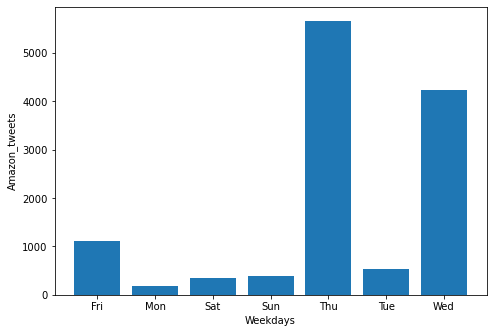

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Amazon_tweets = [1107,188,340,386,5674,544,4232]
ax.bar(Weekdays,Amazon_tweets)
ax.set_ylabel('Amazon_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [20]:
Apple = df.loc[(df['author_id'] == 'AppleSupport')|(df['customer'] == 'AppleSupport')]
Apple

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0,115854,Tue,Oct,31,22:27:49,+0000,2017
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0,115854,Tue,Oct,31,22:36:27,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99696,125804,AppleSupport,False,Fri Nov 24 02:32:26 +0000 2017,@144230 If you're having issues with your iPho...,NaN,125805.0,144230,Fri,Nov,24,02:32:26,+0000,2017
99698,125806,AppleSupport,False,Fri Nov 24 02:31:00 +0000 2017,@143286 Great! We're glad to see you were able...,"125,807,125,808",125809.0,143286,Fri,Nov,24,02:31:00,+0000,2017
99699,125807,143286,True,Fri Nov 24 02:34:10 +0000 2017,@AppleSupport And I can’t!,NaN,125806.0,AppleSupport,Fri,Nov,24,02:34:10,+0000,2017
99700,125808,143286,True,Fri Nov 24 02:33:57 +0000 2017,"@AppleSupport Well, it’s still an issue as I s...",NaN,125806.0,AppleSupport,Fri,Nov,24,02:33:57,+0000,2017


In [21]:
Apple.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,335,335,335,335,335,194,288,334,335,335,335,335,335
Mon,43,43,43,43,43,33,31,42,43,43,43,43,43
Sat,55,55,55,55,55,40,47,54,55,55,55,55,55
Sun,146,146,146,146,146,95,121,145,146,146,146,146,146
Thu,2216,2216,2216,2216,2216,1340,1715,2214,2216,2216,2216,2216,2216
Tue,347,347,347,347,347,267,267,344,347,347,347,347,347
Wed,2639,2639,2639,2639,2639,1582,2074,2639,2639,2639,2639,2639,2639


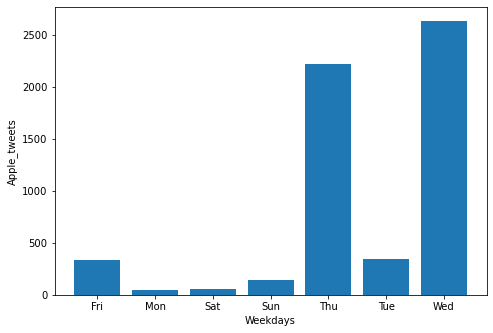

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Apple_tweets = [335,43,55,146,2216,347,2639]
ax.bar(Weekdays,Apple_tweets)
ax.set_ylabel('Apple_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [23]:
Uber = df.loc[(df['author_id'] == 'Uber_Support')|(df['customer'] == 'Uber_Support')]
Uber

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
463,768,Uber_Support,False,Tue Oct 31 22:28:17 +0000 2017,@115872 Happy to follow up! Contact us via htt...,"769,770",771.0,115872,Tue,Oct,31,22:28:17,+0000,2017
464,769,115872,True,Tue Oct 31 22:30:07 +0000 2017,@Uber_Support Already did that was told we req...,NaN,768.0,Uber_Support,Tue,Oct,31,22:30:07,+0000,2017
465,770,Uber_Support,False,Tue Oct 31 22:31:08 +0000 2017,@115872 We apologize for the trouble! Send us ...,NaN,768.0,115872,Tue,Oct,31,22:31:08,+0000,2017
467,772,Uber_Support,False,Tue Oct 31 22:25:26 +0000 2017,@115874 We're here to help! Send us a note her...,NaN,773.0,115874,Tue,Oct,31,22:25:26,+0000,2017
469,774,Uber_Support,False,Tue Oct 31 22:19:18 +0000 2017,"@115875 We’re here to help, Travis! Send us a ...",NaN,775.0,115875,Tue,Oct,31,22:19:18,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99770,125880,Uber_Support,False,Fri Nov 24 02:33:29 +0000 2017,@144245 Happy to take a closer look! Send us a...,NaN,125881.0,144245,Fri,Nov,24,02:33:29,+0000,2017
99771,125881,144245,True,Fri Nov 24 02:32:48 +0000 2017,@Uber_Support - I have a problem with credits ...,125880,NaN,Uber_Support,Fri,Nov,24,02:32:48,+0000,2017
99772,125882,Uber_Support,False,Fri Nov 24 02:30:56 +0000 2017,@144246 We take this very seriously. Please se...,NaN,125883.0,144246,Fri,Nov,24,02:30:56,+0000,2017
99899,126022,Uber_Support,False,Sat Nov 18 22:38:26 +0000 2017,@144278 Happy to help! You can always share yo...,126023,126024.0,144278,Sat,Nov,18,22:38:26,+0000,2017


In [24]:
Uber.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,336,336,336,336,336,187,301,336,336,336,336,336,336
Mon,30,30,30,30,30,27,26,30,30,30,30,30,30
Sat,35,35,35,35,35,26,32,35,35,35,35,35,35
Sun,120,120,120,120,120,75,106,120,120,120,120,120,120
Thu,1619,1619,1619,1619,1619,907,1349,1617,1619,1619,1619,1619,1619
Tue,183,183,183,183,183,137,139,183,183,183,183,183,183
Wed,1478,1478,1478,1478,1478,810,1206,1478,1478,1478,1478,1478,1478


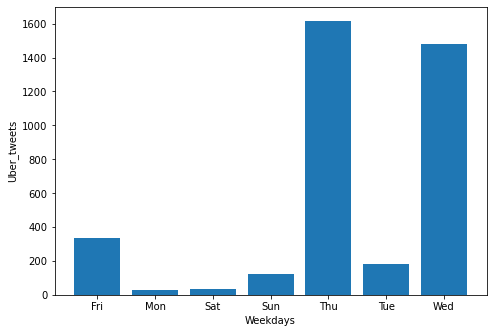

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Uber_tweets = [336,30,35,120,1619,183,1478]
ax.bar(Weekdays,Uber_tweets)
ax.set_ylabel('Uber_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [26]:
Tes = df.loc[(df['author_id'] == 'Tesco')|(df['customer'] == 'Tesco')]
Tes

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
480,785,Tesco,False,Tue Oct 31 22:18:58 +0000 2017,"@115881 Hi Cade, thanks so much for sending th...",NaN,786.0,115881,Tue,Oct,31,22:18:58,+0000,2017
481,786,115881,True,Tue Oct 31 20:29:25 +0000 2017,"@Tesco Tall lady 6ft, slim, was on the till ab...","785,787",788.0,Tesco,Tue,Oct,31,20:29:25,+0000,2017
482,788,Tesco,False,Tue Oct 31 19:47:00 +0000 2017,"@115881 Hi Cade, what was my colleagues name? ...",786,789.0,115881,Tue,Oct,31,19:47:00,+0000,2017
483,789,115881,True,Tue Oct 31 18:02:11 +0000 2017,@Tesco 3/3 on the wrong which I really don’t a...,788,NaN,Tesco,Tue,Oct,31,18:02:11,+0000,2017
1222,1813,Tesco,False,Tue Oct 31 22:41:35 +0000 2017,"@116114 Hi there, I've replied to your DM abou...",NaN,1814.0,116114,Tue,Oct,31,22:41:35,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99374,124880,143978,True,Fri Nov 24 02:02:25 +0000 2017,@Tesco I have sent my details on two separate ...,125416,124879.0,Tesco,Fri,Nov,24,02:02:25,+0000,2017
99375,125427,Tesco,False,Fri Nov 24 02:13:39 +0000 2017,"@144123 I'm sorry to advise Andrew, I am not a...",125428,125429.0,144123,Fri,Nov,24,02:13:39,+0000,2017
99376,125428,144123,True,Fri Nov 24 08:32:55 +0000 2017,"@Tesco Ah, no big deal, I know you used to sel...",125430,125427.0,Tesco,Fri,Nov,24,08:32:55,+0000,2017
99377,125430,Tesco,False,Fri Nov 24 08:50:24 +0000 2017,@144123 No problem Andrew. Thanks! - Brian,NaN,125428.0,144123,Fri,Nov,24,08:50:24,+0000,2017


In [27]:
Tes.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,167,167,167,167,167,88,152,167,167,167,167,167,167
Mon,58,58,58,58,58,46,43,57,58,58,58,58,58
Sat,37,37,37,37,37,31,29,37,37,37,37,37,37
Sun,54,54,54,54,54,30,50,53,54,54,54,54,54
Thu,1339,1339,1339,1339,1339,835,1031,1339,1339,1339,1339,1339,1339
Tue,226,226,226,226,226,194,155,225,226,226,226,226,226
Wed,868,868,868,868,868,494,702,868,868,868,868,868,868


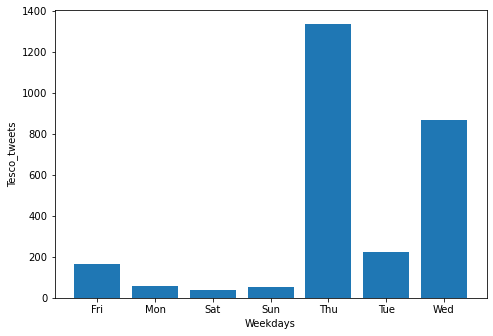

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
Tesco_tweets = [167,58,37,54,1339,226,868]
ax.bar(Weekdays,Tesco_tweets)
ax.set_ylabel('Tesco_tweets')
ax.set_xlabel('Weekdays')
plt.show()

In [29]:
British = df.loc[(df['author_id'] == 'British_Airways')|(df['customer'] == 'British_Airways')]
British

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
558,867,British_Airways,False,Tue Oct 31 22:28:36 +0000 2017,@115892 caused. We're unable to offer a compli...,"868,869,870,871",872.0,115892,Tue,Oct,31,22:28:36,+0000,2017
559,868,115892,True,Tue Oct 31 22:34:33 +0000 2017,"@British_Airways Sure, how much would an upgra...",873,867.0,British_Airways,Tue,Oct,31,22:34:33,+0000,2017
560,873,British_Airways,False,Wed Nov 01 09:35:44 +0000 2017,@115892 Please can you DM us your booking refe...,NaN,868.0,115892,Wed,Nov,01,09:35:44,+0000,2017
561,869,115892,True,Wed Nov 01 08:44:59 +0000 2017,"@British_Airways Or, more importantly, are the...",NaN,867.0,British_Airways,Wed,Nov,01,08:44:59,+0000,2017
562,870,115892,True,Wed Nov 01 08:48:52 +0000 2017,@British_Airways This itinerary is preferred--...,NaN,867.0,British_Airways,Wed,Nov,01,08:48:52,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,125931,British_Airways,False,Wed Nov 22 20:35:22 +0000 2017,"@144261 We don't like to hear this, David. Wha...",125930,125932.0,144261,Wed,Nov,22,20:35:22,+0000,2017
99822,125932,144261,True,Wed Nov 22 16:57:56 +0000 2017,@British_Airways \nIf you want to travel with ...,125931,NaN,British_Airways,Wed,Nov,22,16:57:56,+0000,2017
99823,125933,British_Airways,False,Fri Nov 24 02:47:04 +0000 2017,@144262 I'm afraid we don't offer test flights...,NaN,125934.0,144262,Fri,Nov,24,02:47:04,+0000,2017
99824,125934,144262,True,Fri Nov 24 02:27:24 +0000 2017,@British_Airways How about a test flight,125933,125935.0,British_Airways,Fri,Nov,24,02:27:24,+0000,2017


In [30]:
British.groupby(by="weekday").count()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,month,day,time,+0000,year
weekday,,,,,,,,,,,,,
Fri,193,193,193,193,193,96,177,192,193,193,193,193,193
Mon,48,48,48,48,48,40,39,47,48,48,48,48,48
Sat,44,44,44,44,44,40,29,44,44,44,44,44,44
Sun,63,63,63,63,63,43,59,63,63,63,63,63,63
Thu,1026,1026,1026,1026,1026,686,779,1025,1026,1026,1026,1026,1026
Tue,301,301,301,301,301,236,184,298,301,301,301,301,301
Wed,766,766,766,766,766,463,615,763,766,766,766,766,766


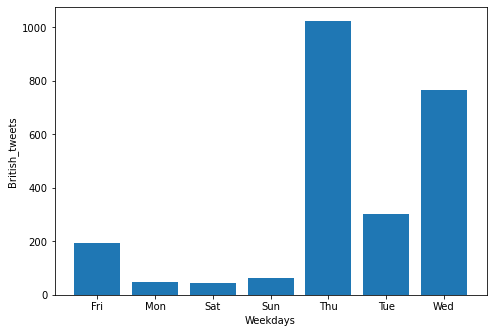

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Weekdays = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu','Tue','Wed']
British_tweets = [193,48,44,63,1026,301,766]
ax.bar(Weekdays,British_tweets)
ax.set_ylabel('British_tweets')
ax.set_xlabel('Weekdays')
plt.show()

Q3) How many customers requested for support from AmazonHelp in the data set?

In [32]:
Support = df.loc[(df['customer'] == 'AmazonHelp')]
Support.count()

tweet_id                   5547
author_id                  5547
inbound                    5547
created_at                 5547
text                       5547
response_tweet_id          4306
in_response_to_tweet_id    4911
customer                   5547
weekday                    5547
month                      5547
day                        5547
time                       5547
+0000                      5547
year                       5547
dtype: int64

Answer - 5547 customers requested for support from AmazonHelp in the dataset. 

Q4) - Among the top 5 companies, which company received the most positive sentiments from customers? (Hint: determine the sentiments of the tweets generated by customers, compute the portions of positive vs. negative tweets, compare the proportions positive tweets between the top 5 companies)

In [56]:
#Cleaning the text : 
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).(>).(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

df['text'] = preprocess(df['text']) 

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2130795674.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("(<br/>)", "")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2130795674.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(<a).(>).(</a>)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2130795674.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&amp)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2130795674.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('(&gt)', '')
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2130795674.py:7: FutureWarning: The default value of regex wil

In [57]:
df

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,115712,Tue,Oct,31,22:10:47,+0000,2017
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare,Tue,Oct,31,22:11:45,+0000,2017
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,sprintcare,Tue,Oct,31,22:08:27,+0000,2017
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,115712,Tue,Oct,31,21:54:49,+0000,2017
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,sprintcare,Tue,Oct,31,21:49:35,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,126120,AmazonHelp,False,Fri Nov 24 02:50:29 +0000 2017,@144297 We understand you have received a diff...,126121,126122.0,144297,Fri,Nov,24,02:50:29,+0000,2017
99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017
99997,126123,AmazonHelp,False,Fri Nov 24 10:38:31 +0000 2017,@144297 If you've shared your details via the ...,NaN,126121.0,144297,Fri,Nov,24,10:38:31,+0000,2017
99998,126122,144297,True,Fri Nov 24 02:15:13 +0000 2017,@AmazonHelp It was a great help from ur side w...,126120,126124.0,AmazonHelp,Fri,Nov,24,02:15:13,+0000,2017


In [58]:
Sentiment = df.query("customer in ('AmazonHelp', 'AppleSupport', 'Uber_Support', 'Tesco', 'SpotifyCares' )")
#customer'] == 'AmazonHelp')|(df['customer'] == 'AppleSupport')|(df['customer']== 'Uber_Support')|(df['customer'] == 'Tesco')|(df['customer'] == 'British_airways')]
Sentiment = Sentiment.reset_index()
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017


In [59]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranithagaddam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017


In [61]:
PveIndex = [] #Index for positive sentiment.
NveIndex = [] #Index for negative sentiment.
for r in range(len(Sentiment['text'])):
    rev = Sentiment['text'][r]
    # Compute Sentiment Score for each review
    SentimentScores = sid.polarity_scores(rev) 
    # Generate sentiment index based on sentiment score, We set 0.3 as threshold for strong sentiments.
    if SentimentScores['pos']> 0.3:
        PveIndex.append(1)
    else:
        PveIndex.append(0)
      
    if SentimentScores['neg']> 0.3:
        NveIndex.append(1)
    else:
        NveIndex.append(0) 
 
#Add sentiment indixes to the original data frame.
Sentiment['Positive_sentiment'] = PveIndex   
Sentiment['Negative_sentiment'] = NveIndex
Sentiment

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year,Positive_sentiment,Negative_sentiment
0,182,270,115770,True,Wed Nov 22 09:24:30 +0000 2017,@AmazonHelp ありがとうございます。\n今、電話で主人が対応していただいてます。,NaN,269.0,AmazonHelp,Wed,Nov,22,09:24:30,+0000,2017,0,0
1,183,271,115770,True,Wed Nov 22 09:30:36 +0000 2017,@AmazonHelp 電話で対応してもらいましたが改良されませんでした。\n保証期間も過ぎ...,273,269.0,AmazonHelp,Wed,Nov,22,09:30:36,+0000,2017,0,0
2,185,274,115770,True,Wed Nov 22 09:44:04 +0000 2017,@AmazonHelp こちらこそありがとうございました。,275,273.0,AmazonHelp,Wed,Nov,22,09:44:04,+0000,2017,0,0
3,322,616,115820,True,Tue Oct 31 23:22:08 +0000 2017,@AmazonHelp 3 different people have given 3 di...,618,615.0,AmazonHelp,Tue,Oct,31,23:22:08,+0000,2017,0,0
4,324,619,115820,True,Tue Oct 31 23:32:26 +0000 2017,@AmazonHelp I frankly don't have the patience ...,NaN,618.0,AmazonHelp,Tue,Oct,31,23:32:26,+0000,2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,99986,126111,144294,True,Wed Nov 22 06:36:57 +0000 2017,@AmazonHelp What timeline should I expect for ...,126110,126112.0,AmazonHelp,Wed,Nov,22,06:36:57,+0000,2017,0,0
12186,99988,126113,144294,True,Wed Nov 22 05:28:53 +0000 2017,@AmazonHelp @AmazonHelp I contact your custome...,126112,126114.0,AmazonHelp,Wed,Nov,22,05:28:53,+0000,2017,0,0
12187,99990,126115,144294,True,Wed Nov 22 04:50:04 +0000 2017,@AmazonHelp Amazon whats going on! U have tak...,126114,NaN,AmazonHelp,Wed,Nov,22,04:50:04,+0000,2017,0,0
12188,99996,126121,144297,True,Fri Nov 24 10:20:04 +0000 2017,@AmazonHelp I have already raised d issue ther...,126123,126120.0,AmazonHelp,Fri,Nov,24,10:20:04,+0000,2017,0,0


In [62]:
#Count Positive and Negative Reviews by Class Name
SentimentCountByClass = Sentiment.groupby('customer').sum()[['Positive_sentiment','Negative_sentiment']]
CountByClass = Sentiment.groupby('customer').count()[['tweet_id']]
SentimentCountByClass["Total"] = CountByClass['tweet_id']
SentimentCountByClass 

,Positive_sentiment,Negative_sentiment,Total
customer,,,
AmazonHelp,440,190,5547
AppleSupport,220,89,2675
SpotifyCares,152,22,970
Tesco,154,41,1299
Uber_Support,168,97,1699


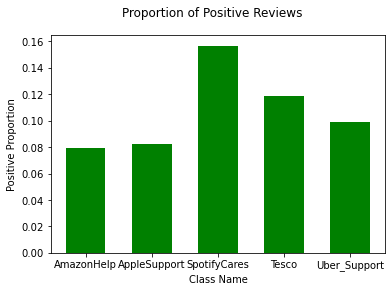

In [64]:
#Select some items and plot proportion of reviews with respect to positive sentiments
PositivePercentage = [];
for i in range(len(SentimentCountByClass)):
    PositivePercentage.append(SentimentCountByClass.iloc[i]['Positive_sentiment']/SentimentCountByClass.iloc[i]['Total'])

plt.bar(SentimentCountByClass.index,PositivePercentage, color='green', width=0.6)
plt.xlabel('Class Name')
plt.ylabel('Positive Proportion')
plt.suptitle('Proportion of Positive Reviews');

Q5 - TOPIC MODELLING 

In [65]:
Topic = df.query("customer in ('AppleSupport')")
Topic

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,@AppleSupport Tried resetting my settings .. r...,701,703.0,AppleSupport,Tue,Oct,31,22:11:31,+0000,2017
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,@AppleSupport This is what it looks like https...,703,705.0,AppleSupport,Tue,Oct,31,21:59:17,+0000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99691,125799,144228,True,Fri Nov 24 02:45:23 +0000 2017,@AppleSupport I seriously can’t get customer s...,NaN,125796.0,AppleSupport,Fri,Nov,24,02:45:23,+0000,2017
99692,125800,144228,True,Fri Nov 24 02:39:57 +0000 2017,@AppleSupport It requires a serial number whic...,NaN,125796.0,AppleSupport,Fri,Nov,24,02:39:57,+0000,2017
99695,125803,144229,True,Fri Nov 24 02:24:18 +0000 2017,@AppleSupport My iPhone power button stops fun...,125802,NaN,AppleSupport,Fri,Nov,24,02:24:18,+0000,2017
99699,125807,143286,True,Fri Nov 24 02:34:10 +0000 2017,@AppleSupport And I can’t!,NaN,125806.0,AppleSupport,Fri,Nov,24,02:34:10,+0000,2017


In [76]:
regex ="\B@\w+"
Topic.text = Topic.text.str.replace(regex, '')

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3765219287.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic.text = Topic.text.str.replace(regex, '')
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
regex ="http\S+"
Topic.text = Topic.text.str.replace(regex, '')

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3865725790.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic.text = Topic.text.str.replace(regex, '')


In [78]:
Topic.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,The newest update. I️ made sure to download i...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,why are my I️’s changing not showing up corre...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,Tried resetting my settings .. restarting my ...,701,703.0,AppleSupport,Tue,Oct,31,22:11:31,+0000,2017
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,This is what it looks like,703,705.0,AppleSupport,Tue,Oct,31,21:59:17,+0000,2017


In [79]:
# removing everything except alphabets`
Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")

# removing short words
Topic['clean_text'] = Topic['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
Topic['clean_text'] = Topic['clean_text'].apply(lambda x: x.lower())

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3880879612.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3880879612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['clean_text'] = Topic['text'].str.replace("[^a-zA-Z#]", " ")
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3880879612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [80]:
Topics = Topic.clean_text.tolist()

In [84]:
!pip install --upgrade gensim

You should consider upgrading via the '/Users/pranithagaddam/anaconda3/bin/python -m pip install --upgrade pip' command.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from collections import Counter

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction import text

import gensim
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [102]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
split_Topics = list(sent_to_words(Topics))

In [103]:
all_words = [word for convo in split_Topics for word in convo]

for word in all_words:
    word = word.lower()

In [104]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [105]:
domain_stopwords = ['thank', 'dm', 'issue', 'app', 'order', 'phone', 'number', 'account', 'service', 'time',
                    'link', 'apology', 'direct_message', 'thanks', 'help', 'email', 'sorry', 'team', 'issues',
                    'just', 'like', 'hello', 'assist', 'want', 'know', 'idea', 'details', 'check', 'look', 
                    'make', 'need', 'soon', 'check', 'send', 'private', 'message', 'kindly', 'rgds', 'still', 
                    'customer', 'regard', 'please', 'would']

english_stopwords = stopwords.words('english')

clean_Topics = []

for convo in split_Topics:
    no_stop = [word for word in convo if word not in english_stopwords]
    
    no_domain = [word for word in no_stop if word not in domain_stopwords]

    clean_words = [get_lemma(word) for word in no_domain]
    
    clean_Topics.append(clean_words)

CountVectorizer

In [106]:
len(vectorizer.get_feature_names())

252

In [109]:
terms = vectorizer.get_feature_names

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

TypeError: object of type 'method' has no len()

In [44]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
Topic['clean_text']= Topic['text'].apply(lambda x:remove_punctuation(x))
Topic.head()

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/3697549738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['clean_text']= Topic['text'].apply(lambda x:remove_punctuation(x))


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,customer,weekday,month,day,time,+0000,year,clean_text
397,697,115854,True,Tue Oct 31 22:31:23 +0000 2017,@AppleSupport The newest update. I️ made sure ...,699,696.0,AppleSupport,Tue,Oct,31,22:31:23,+0000,2017,AppleSupport The newest update I️ made sure to...
399,698,115854,True,Tue Oct 31 22:17:40 +0000 2017,@AppleSupport https://t.co/NV0yucs0lB,696,700.0,AppleSupport,Tue,Oct,31,22:17:40,+0000,2017,AppleSupport httpstcoNV0yucs0lB
400,700,115854,True,Tue Oct 31 22:16:56 +0000 2017,@AppleSupport why are my I️’s changing not sho...,698,NaN,AppleSupport,Tue,Oct,31,22:16:56,+0000,2017,AppleSupport why are my I️’s changing not show...
402,702,115855,True,Tue Oct 31 22:11:31 +0000 2017,@AppleSupport Tried resetting my settings .. r...,701,703.0,AppleSupport,Tue,Oct,31,22:11:31,+0000,2017,AppleSupport Tried resetting my settings rest...
404,704,115855,True,Tue Oct 31 21:59:17 +0000 2017,@AppleSupport This is what it looks like https...,703,705.0,AppleSupport,Tue,Oct,31,21:59:17,+0000,2017,AppleSupport This is what it looks like httpst...


In [45]:
Topic['msg_lower']= Topic['clean_text'].map(lambda x: x.lower())

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2676472081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['msg_lower']= Topic['clean_text'].map(lambda x: x.lower())


In [46]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
Topic['msg_tokenized']= Topic['msg_lower'].apply(lambda x: tokenization(x))

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/2770115594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['msg_tokenized']= Topic['msg_lower'].apply(lambda x: tokenization(x))


In [47]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [48]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [49]:
#applying the function
Topic['no_stopwords']= Topic['msg_tokenized'].apply(lambda x:remove_stopwords(x))

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/1178936278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['no_stopwords']= Topic['msg_tokenized'].apply(lambda x:remove_stopwords(x))


In [50]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [51]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
Topic['msg_stemmed']=Topic['no_stopwords'].apply(lambda x: stemming(x))

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/1956048796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['msg_stemmed']=Topic['no_stopwords'].apply(lambda x: stemming(x))


In [52]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [53]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
Topic['msg_lemmatized']=Topic['no_stopwords'].apply(lambda x:lemmatizer(x))

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_40734/1357587965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic['msg_lemmatized']=Topic['no_stopwords'].apply(lambda x:lemmatizer(x))


In [54]:
Topic['msg_lemmatized']
a = Topic['msg_lemmatized']
a

397      [applesupport the newest update i️ made sure t...
399                     [applesupport  httpstconv0yucs0lb]
400      [applesupport why are my i️’s changing not sho...
402      [applesupport tried resetting my settings  res...
404      [applesupport this is what it looks like https...
                               ...                        
99691    [applesupport i seriously can’t get customer s...
99692    [applesupport it requires a serial number whic...
99695    [applesupport my iphone power button stops fun...
99699                           [applesupport and i can’t]
99700    [applesupport well it’s still an issue as i sh...
Name: msg_lemmatized, Length: 2675, dtype: object

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

A = vectorizer.fit_transform(a)
A.shape # check shape of the document-term matrix

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

NameError: name 'count_vectorizer' is not defined

In [67]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

NameError: name 'total_counts' is not defined

In [68]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 10
 
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_ 

NameError: name 'ReducedCount' is not defined

In [69]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

AttributeError: 'LatentDirichletAllocation' object has no attribute 'components_'

In [70]:
 for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

NameError: name 'Word_Topics_Pro' is not defined

In [71]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords 

NameError: name 'Word_Topics_Pro' is not defined

In [72]:
import sys
print(sys.executable)

/Users/pranithagaddam/anaconda3/bin/python


In [73]:
!pip install wordcloud

You should consider upgrading via the '/Users/pranithagaddam/anaconda3/bin/python -m pip install --upgrade pip' command.


In [74]:
from wordcloud import WordCloud
import math

In [75]:
#<details><summary><font color="blue"><b>Click here for solution:</b></font></summary> 
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))       
plt.show() 

NameError: name 'Word_Topics_Pro' is not defined